### Diwali Sales Data: Exploratory Data Analysis on Uploaded Dataset
#### We'll follow this general flow:

1. Load & Understand the Dataset

2. Data Cleaning

3. Descriptive Statistics

4. Exploratory Data Analysis (EDA) & Visualizations

5. Key Insights

## Step 1: Import Required Libraries

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as stats

## Step 2: Load the Dataset

In [86]:
# Load CSV

df = pd.read_csv('Diwali_Sales_Data.csv', encoding='latin1')
df

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0,NaN,NaN
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0,NaN,NaN
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0,NaN,NaN
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0,NaN,NaN


In [137]:
# Display first few rows

df.head(5)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


In [88]:
# Shape of dataset

df.shape

(11251, 15)

In [89]:
# Data types and nulls

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


## Step 3: Data Cleaning

In [90]:
# Check missing values

print(df.isnull().sum())

User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Amount                 12
Status              11251
unnamed1            11251
dtype: int64


In [91]:
# Replace the missing value of 0in the Amount column

df['Amount'] = df['Amount'].fillna(0)
df

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0,NaN,NaN
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0,NaN,NaN
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0,NaN,NaN
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0,NaN,NaN


In [92]:
# Remove/Drop the unused/blank column(Statts, Unnamed)

df.drop(['Status','unnamed1'],axis=1, inplace=True, errors='innore')
df

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0


In [93]:
print(df.isnull().sum())

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64


## Step 4: Descriptive Statistics

In [94]:
# # Summary statistics for numerical columns

df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.125100e+04,11251.000000,11251.000000,11251.000000,11251.000000
mean,1.003004e+06,35.421207,0.420318,2.489290,9443.527902
std,1.716125e+03,12.754122,0.493632,1.115047,5228.684037
min,1.000001e+06,12.000000,0.000000,1.000000,0.000000
25%,1.001492e+06,27.000000,0.000000,1.500000,5440.000000
50%,1.003065e+06,33.000000,0.000000,2.000000,8108.000000
75%,1.004430e+06,43.000000,1.000000,3.000000,12671.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [95]:
# # Check for categorical columns

df.select_dtypes(include=object).columns

Index(['Cust_name', 'Product_ID', 'Gender', 'Age Group', 'State', 'Zone',
       'Occupation', 'Product_Category'],
      dtype='object')

In [96]:
# Value counts for categorical data

for col in df.select_dtypes(include='object').columns:
    print(f"\nValue counts for {col}:\n", df[col].value_counts())


Value counts for Cust_name:
 Cust_name
Vishakha       42
Shreyshi       32
Sudevi         30
Akshat         29
Alejandro      28
               ..
Madan Mohan     2
Overcash        2
Madhav          2
Bindu           1
Laal            1
Name: count, Length: 1250, dtype: int64

Value counts for Product_ID:
 Product_ID
P00265242    53
P00110942    44
P00184942    37
P00237542    35
P00112142    34
             ..
P00326042     1
P00255342     1
P00347942     1
P00273642     1
P00035742     1
Name: count, Length: 2351, dtype: int64

Value counts for Gender:
 Gender
F    7842
M    3409
Name: count, dtype: int64

Value counts for Age Group:
 Age Group
26-35    4543
36-45    2286
18-25    1879
46-50     987
51-55     832
55+       428
0-17      296
Name: count, dtype: int64

Value counts for State:
 State
Uttar Pradesh       1946
Maharashtra         1526
Karnataka           1305
Delhi               1107
Madhya Pradesh       923
Andhra Pradesh       812
Himachal Pradesh     608
Kerala       

## Step 5: Correlation & Distribution

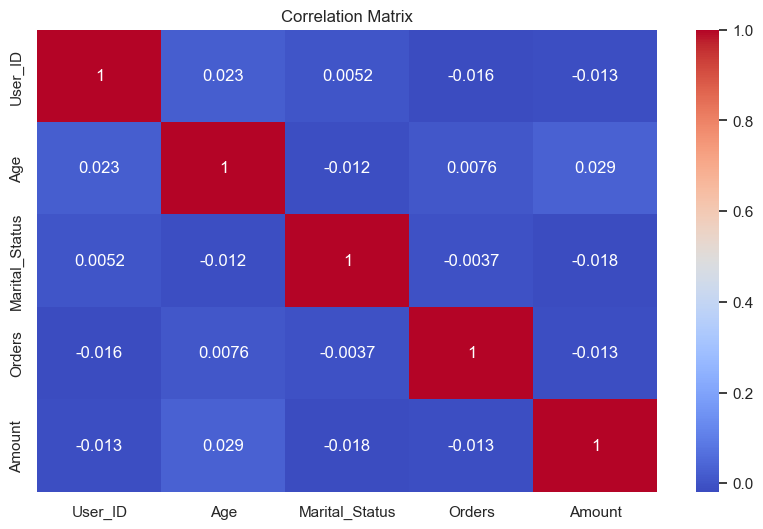

In [132]:
# Correlation matrix

plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Pairplot for basic relationships
# sns.pairplot(df)
# plt.show()

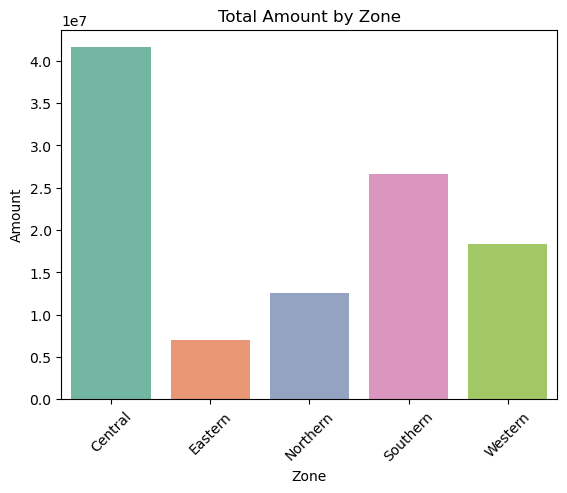

In [98]:
# 1. Bar Chart (Total Amount by Zone)

zone_amount = df.groupby('Zone')['Amount'].sum().reset_index()
sns.barplot(data=zone_amount, x='Zone', y='Amount', hue='Zone', palette='Set2', legend=False)
plt.title('Total Amount by Zone')
plt.xticks(rotation=45)
plt.show()

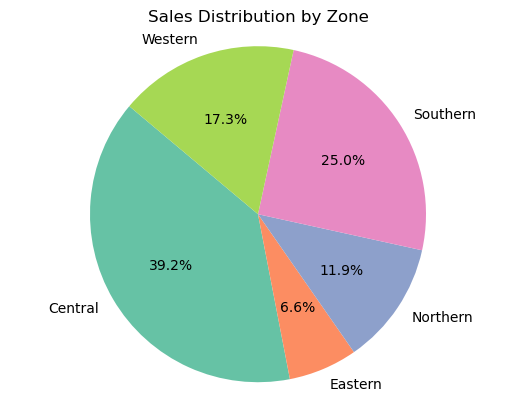

In [99]:
# 2. Pie Chart (Percentage by Zone)

zone_pie = df.groupby('Zone')['Amount'].sum()
plt.pie(zone_pie, labels=zone_pie.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2'))
plt.title('Sales Distribution by Zone')
plt.axis('equal')
plt.show()

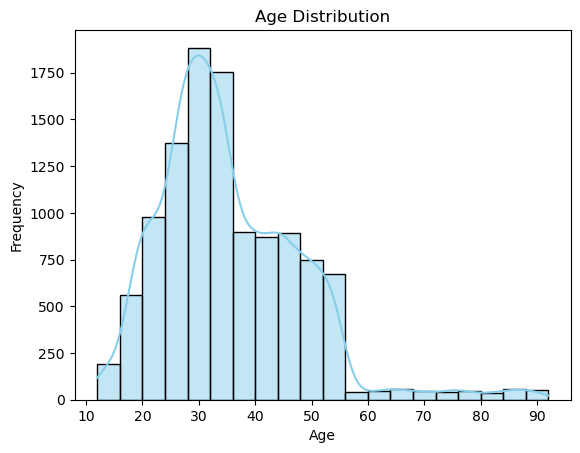

In [100]:
# 3. Histogram (Age Distribution)

sns.histplot(df['Age'], bins=20, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

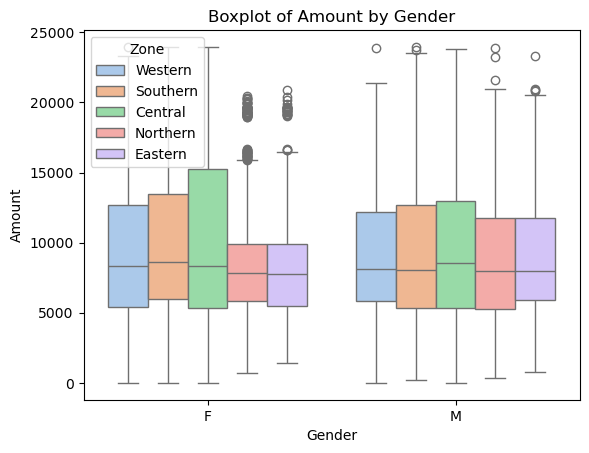

In [101]:
# 4. Boxplot (Outliers in Amount by Gender)abs

sns.boxplot(data=df, x='Gender', y='Amount', hue='Zone', palette='pastel')
plt.title('Boxplot of Amount by Gender')
plt.show()

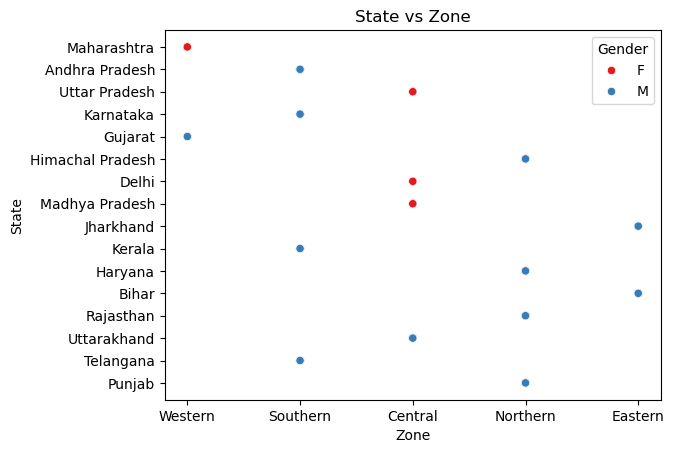

In [102]:
# 5. Scatter Plot (Age vs Amount)

sns.scatterplot(data=df, y='State', x='Zone', hue='Gender', palette='Set1')
plt.title('State vs Zone')
plt.show()

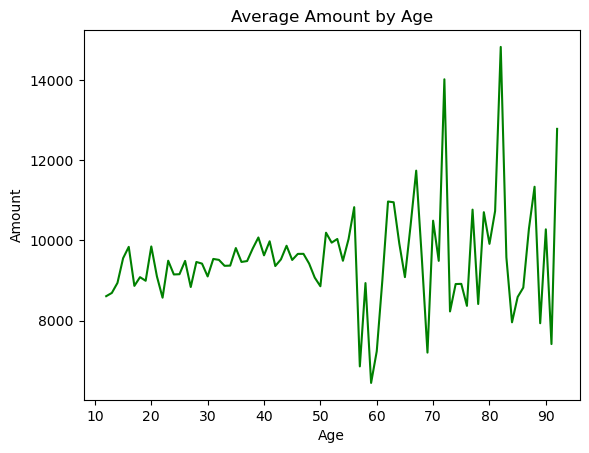

In [103]:
# 6. Line Plot (Average Amount by Age)

age_avg = df.groupby('Age')['Amount'].mean().reset_index()
sns.lineplot(data=age_avg, x='Age', y='Amount', color='green')
plt.title('Average Amount by Age')
plt.show()

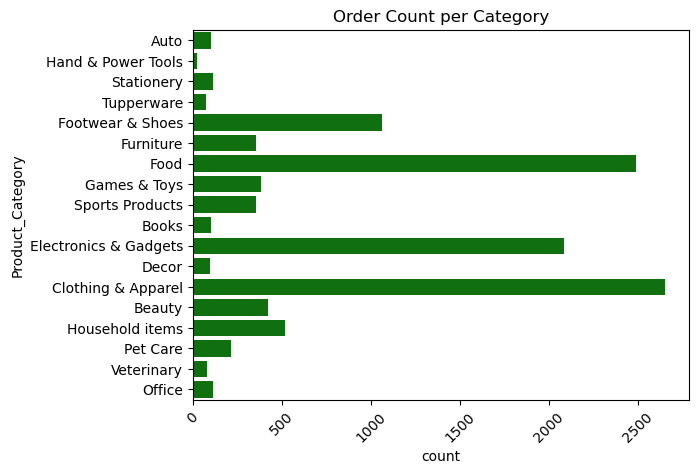

In [104]:
# 7. Count Plot (Count of Orders per Category)

sns.countplot(data=df, y='Product_Category',color='green')
plt.title('Order Count per Category')
plt.xticks(rotation=45)
plt.show()

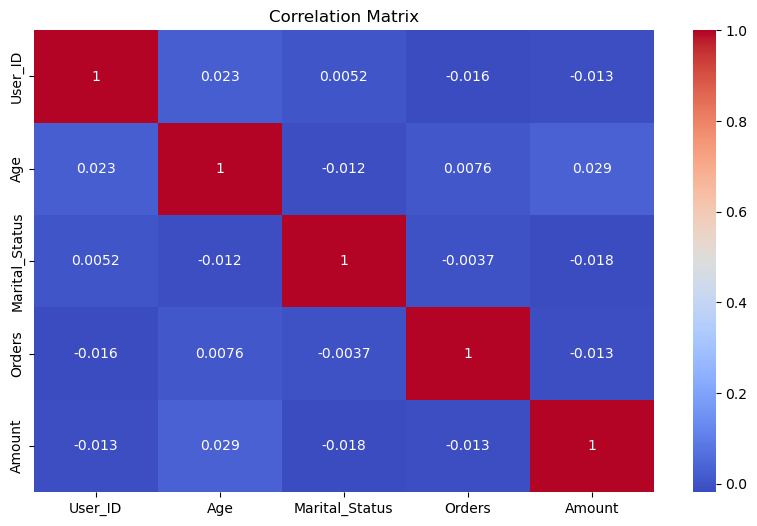

In [105]:
# 8. Heatmap (Correlation Matrix)

plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Step 6: Univariate Analysis

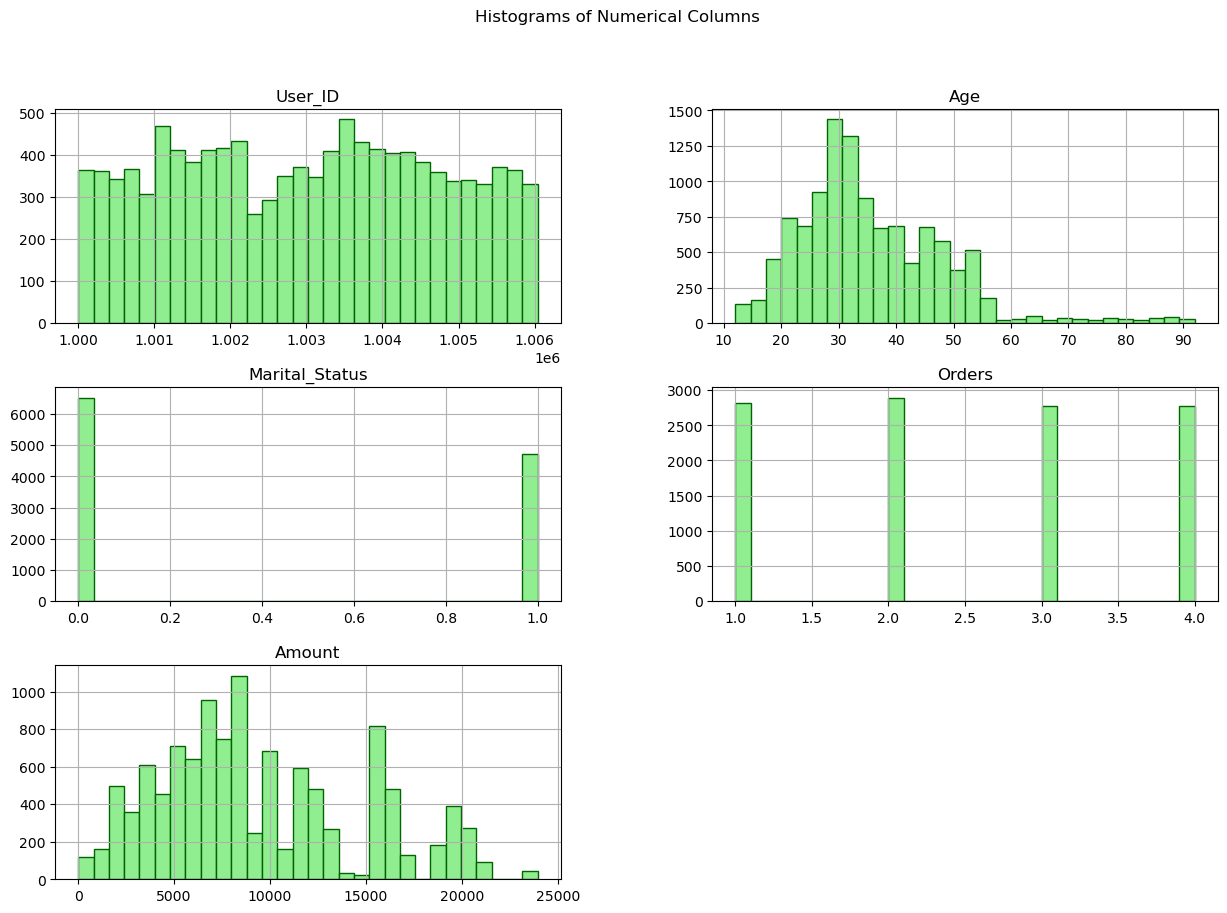

In [106]:
# Histograms

df.hist(figsize=(15, 10), bins=30, color='lightgreen', edgecolor='darkgreen')
plt.suptitle('Histograms of Numerical Columns')
plt.show()

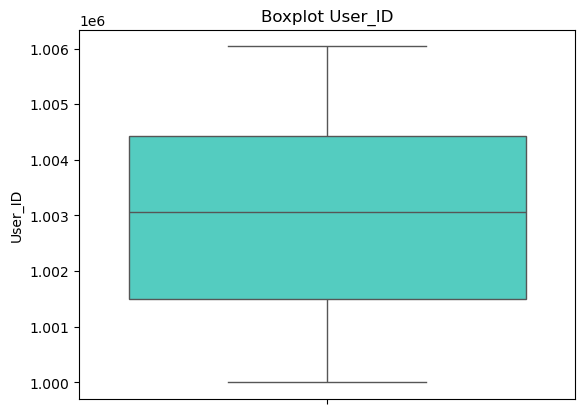

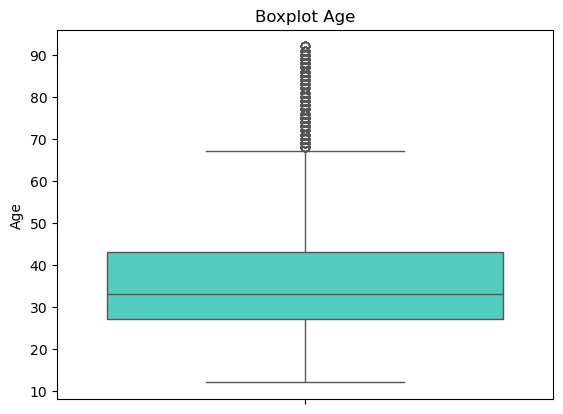

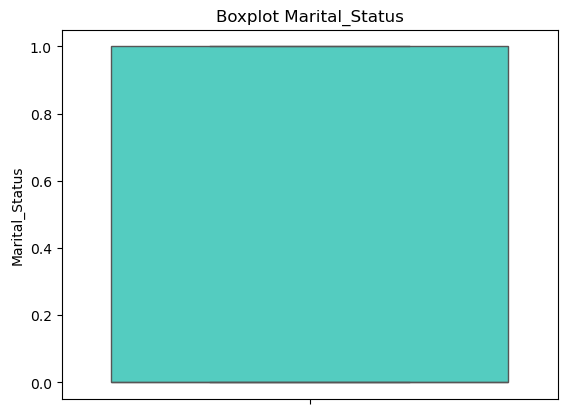

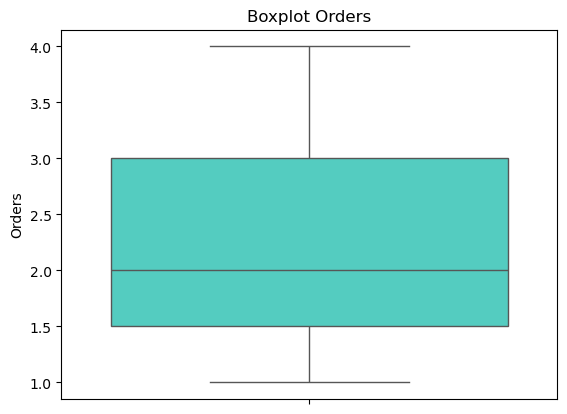

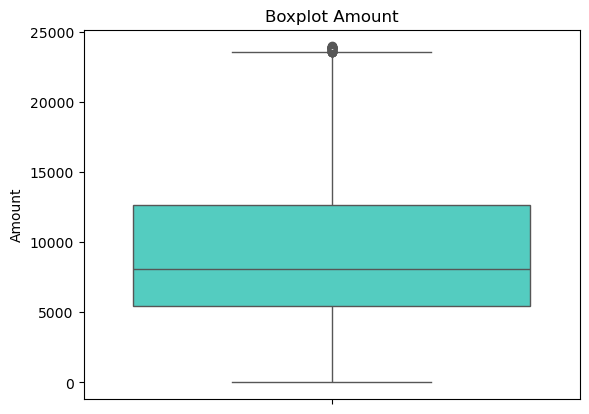

In [107]:
# Boxplots for outliers
for col in df.select_dtypes(include=np.number).columns:
    sns.boxplot(y=df[col], color='turquoise')
    plt.title(f"Boxplot {col}")
    plt.show()

## Step 7: Statistical Insights

In [108]:
from scipy import stats

# Loop through each numeric column in the DataFrame
for column in df.select_dtypes(include=np.number).columns:
    print(f"\nAnalyzing column: {column}")
    
    mean_val = np.mean(df[column])
    median_val = np.median(df[column])
    mode_val = stats.mode(df[column], keepdims=True).mode[0]
    std_dev = np.std(df[column])
    
    print(f"Mean: {mean_val}")
    print(f"Median: {median_val}")
    print(f"Mode: {mode_val}")
    print(f"Standard Deviation: {std_dev}")

# Z-score outlier detection for all numeric columns
print("\nOutliers per column (Z-score > 3):")
z_scores = np.abs(stats.zscore(df.select_dtypes(include=np.number)))
outliers = (z_scores > 3).sum(axis=0)  # Outliers per column

for col, count in zip(df.select_dtypes(include=np.number).columns, outliers):
    print(f"{col}: {count} outliers")


Analyzing column: User_ID
Mean: 1003004.488134388
Median: 1003065.0
Mode: 1001680
Standard Deviation: 1716.0491347674879

Analyzing column: Age
Mean: 35.421207003821884
Median: 33.0
Mode: 30
Standard Deviation: 12.75355548449617

Analyzing column: Marital_Status
Mean: 0.4203181939383166
Median: 0.0
Mode: 0
Standard Deviation: 0.49360997739386103

Analyzing column: Orders
Mean: 2.4892898409030306
Median: 2.0
Mode: 2
Standard Deviation: 1.1149974073357412

Analyzing column: Amount
Mean: 9443.527902408676
Median: 8108.0
Mode: 0.0
Standard Deviation: 5228.451666394689

Outliers per column (Z-score > 3):
User_ID: 0 outliers
Age: 218 outliers
Marital_Status: 0 outliers
Orders: 0 outliers
Amount: 0 outliers


## Step 8: Categorical Analysis

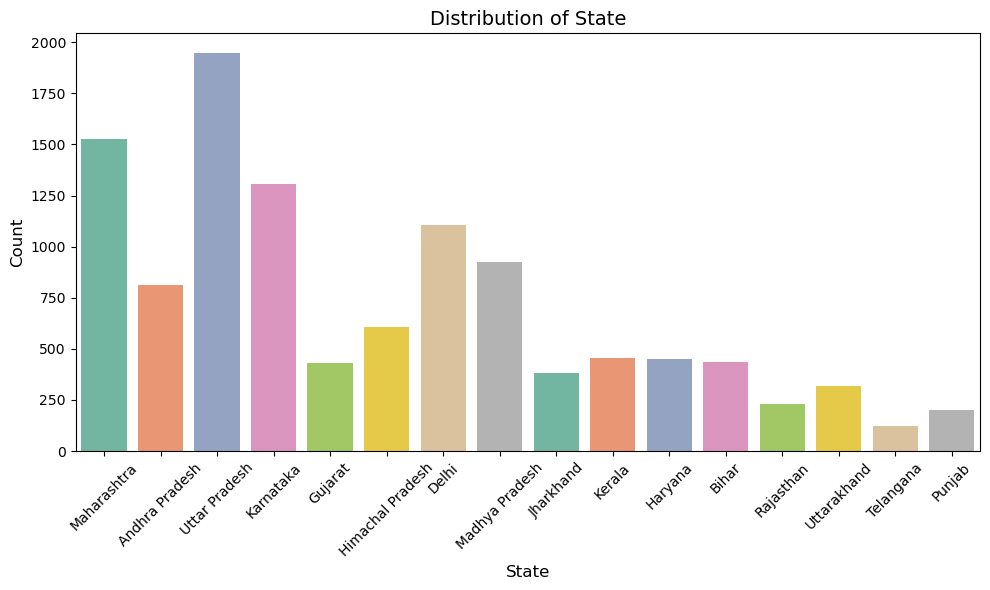

In [118]:
plt.figure(figsize=(10, 6))

# Plot count of 'State' values
ax = sns.countplot(data=df, x='State', hue='State', palette='Set2', legend=False)

plt.title('Distribution of State', fontsize=14)
plt.xlabel('State', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


## Step 9: Save Cleaned Dataset

In [136]:
# Save the cleaned data for future use

df.to_csv("Cleaned_Dataset_Diwali.csv", index=False)